# Alucar - Analisando as vendas

In [75]:
import pandas as pd

In [76]:
dados = pd.read_csv('dados/alucar.csv')

In [77]:
dados.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [78]:
dados.describe().round()

,vendas
count,24.0
mean,288.0
std,222.0
min,10.0
25%,96.0
50%,246.0
75%,451.0
max,721.0


In [79]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


### Temos uma base de dados com 24 tuplas e 2 colunas, não temos dados nulos.

para trabalhar com séries temporais devemos converter e coluna mes para o tipo datetime,
    o mesmo se econtra como tipo object.

In [80]:
dados['mes'] = pd.to_datetime(dados['mes'])
dados.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [81]:
import seaborn as sns

In [82]:
%matplotlib inline
from matplotlib import pyplot as plt

Verificando se as vendas estão aumentando ou diminiuindo

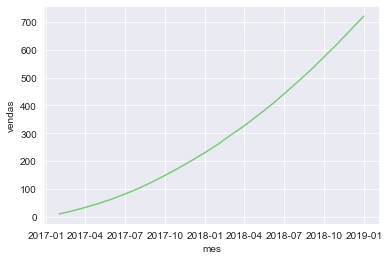

In [83]:
sns.lineplot(x = 'mes', y = 'vendas', data = dados)

As alterações visuais no gráfico foram feitas seguindo o padrão URBAN INSTITUTE.

Text(0, 0.5, 'Vendas (R$)')

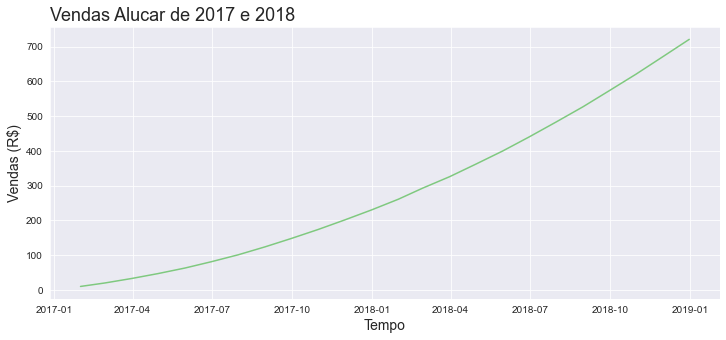

In [84]:
ax = sns.lineplot(x = 'mes', y = 'vendas', data = dados)
# Altera o tamanho de exibição do gráfico
ax.figure.set_size_inches(12,5)

# Setando cores diferente
sns.set_palette('Accent')

# Adiciona um grid de linhas no gráfico
sns.set_style('darkgrid')

# Altera o título do gráfico
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)

# Altera os atributos de título do eixo X
ax.set_xlabel('Tempo', fontsize = 14)

# Altera os atributos de título do eixo Y
ax.set_ylabel('Vendas (R$)', fontsize = 14)

In [85]:
dados.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [86]:
# O comando faz com que o total de vendas do mes 2 seja subtraído pelo mes 1, o 3 subtrai o 2 e adiante.
# O resultado é adicionado em uma nova váriavel na tabela.
dados['aumento'] = dados['vendas'].diff()

In [87]:
dados.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


O dataframe mostra a diferença de aumento de um mês para o outro em relação ao mês anterior
ex: o mês 2 teve 13 vendas a mais que o mês 1, e o mês 4 teve um aumento de 14 vendas em relação ao mês 3.

Visualizaremos o gráfico com a nova variável e a diferença de ganhos entre os meses

Text(0, 0.5, 'Aumento')

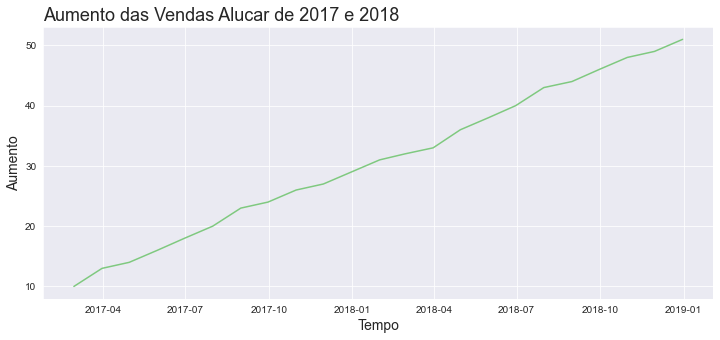

In [88]:
ax = sns.lineplot(x = 'mes', y = 'aumento', data = dados)
# Altera o tamanho de exibição do gráfico
ax.figure.set_size_inches(12,5)

# Setando cores diferente
sns.set_palette('Accent')

# Adiciona um grid de linhas no gráfico
sns.set_style('darkgrid')

# Altera o título do gráfico
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)

# Altera os atributos de título do eixo X
ax.set_xlabel('Tempo', fontsize = 14)

# Altera os atributos de título do eixo Y
ax.set_ylabel('Aumento', fontsize = 14)

##### Definindo uma função para gerar o gráfico com todos os requisitos

In [89]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x = x, y = y, data = dataset)
    # Altera o tamanho de exibição do gráfico
    ax.figure.set_size_inches(12,5)

    # Setando cores diferente
    sns.set_palette('Accent')

    # Adiciona um grid de linhas no gráfico
    sns.set_style('darkgrid')

    # Altera o título do gráfico
    ax.set_title(titulo, loc = 'left', fontsize = 18)

    # Altera os atributos de título do eixo X
    ax.set_xlabel(labelx, fontsize = 14)

    # Altera os atributos de título do eixo Y
    ax.set_ylabel(labely, fontsize = 14)

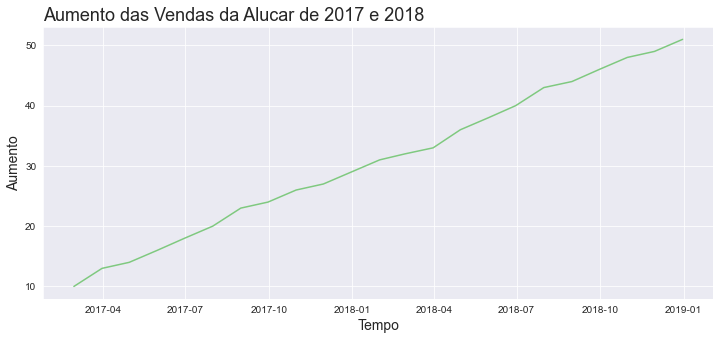

In [90]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', dados)

In [91]:
dados['aceleracao'] = dados['aumento'].diff()
dados.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


A nova variável aceleração, mostra o quanto acelerou essa diferença em relação ao aumento das vendas
ex: se no mês 2 o aumento foi de 13 vendas a mais que no mês 1, e o mês 3 foi de 14 vendas a mais que o mês 2,
a difença então é de 1 venda a mais no aumento do mês 3 em relaçao ao mês 2, de 13 para 14.

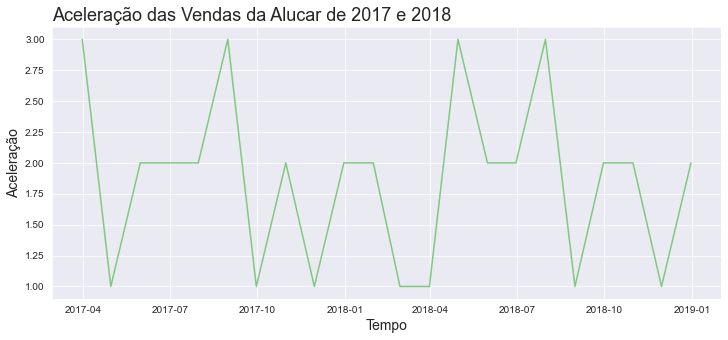

In [92]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', dados)

Podemos ver que todo mês a Alucar cresce em vendas, em escalas de 1 a 3
Percebemos também que em todo esse tempo não tiveram nenhum valor negativo, sempre se manteram positivo em relação ao
aumento de vendas e crescendo todo mês no mínimo 1 ponto.

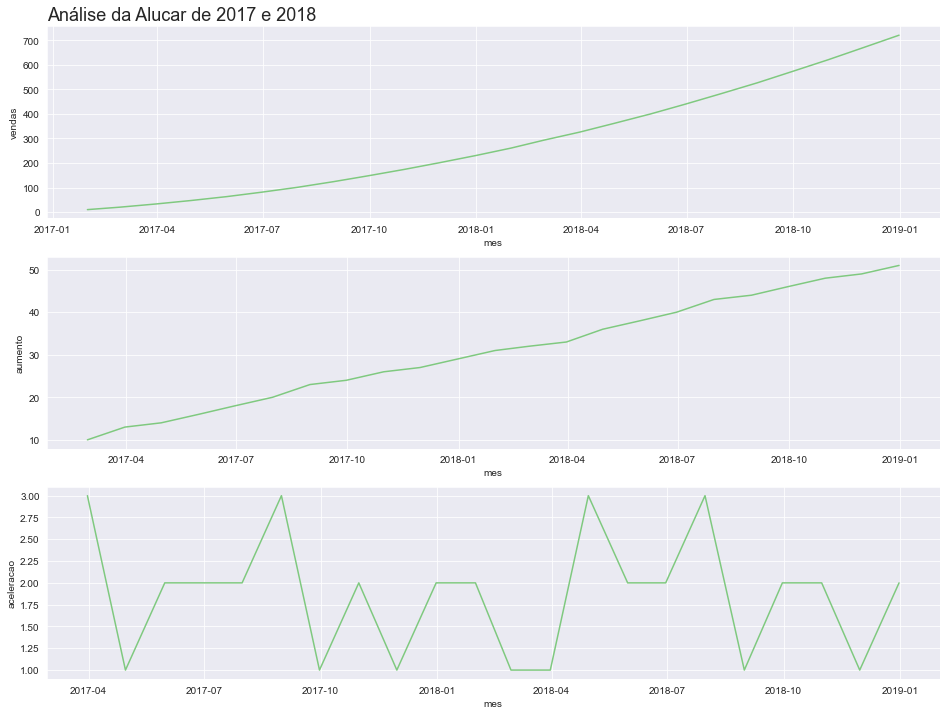

In [93]:
plt.figure(figsize = (16, 12))

# Define quantos graficos seram gerados, o priemrio na posição 1
ax = plt.subplot(3, 1, 1)

# Seta o título dos gráficos
ax.set_title('Análise da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = dados)

# Segundo gráfico na linha posição 2
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = dados)

# Terceiro gráfico na posição 3
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data  = dados)

In [94]:
# Função para plotar 3 gráficos em linha
def plot_comparacao(x, y1, y2, y3, titulo, dataset):
    plt.figure(figsize = (16, 12))

    # Define quantos graficos seram gerados, o priemrio na posição 1
    ax = plt.subplot(3, 1, 1)

    # Seta o título dos gráficos
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)

    # Segundo gráfico na linha posição 2
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)

    # Terceiro gráfico na posição 3
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data  = dataset)

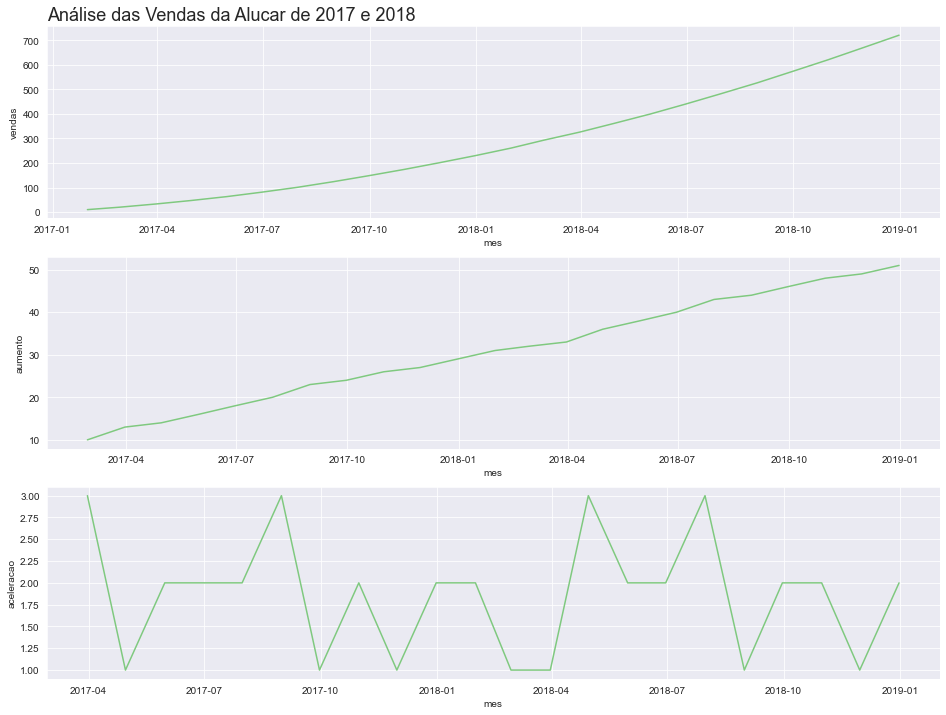

In [95]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               'Análise das Vendas da Alucar de 2017 e 2018', dados)

# Autocorrelação

In [96]:
from pandas.plotting import autocorrelation_plot

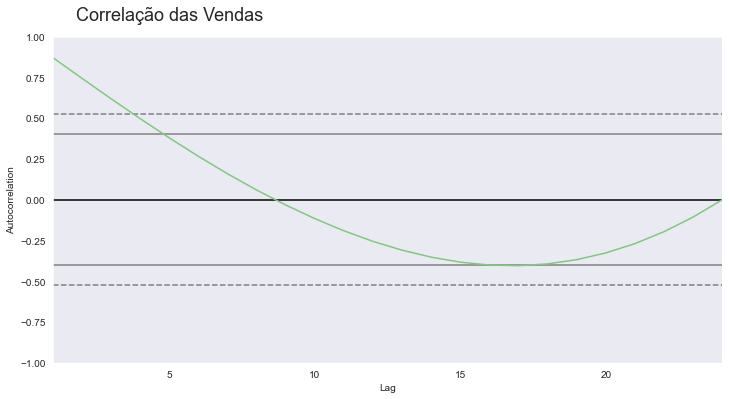

In [97]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95) # x e y posição do título
autocorrelation_plot(dados['vendas'])
ax = ax

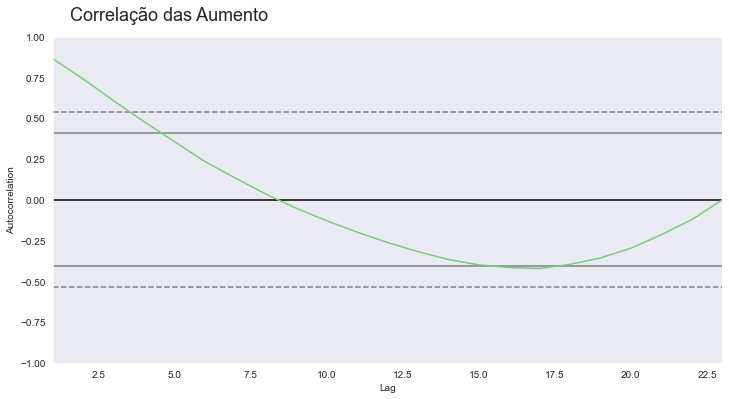

In [98]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aumento', fontsize = 18, x = 0.26, y = 0.95) # x e y posição do título
autocorrelation_plot(dados['aumento'][1:])
ax = ax

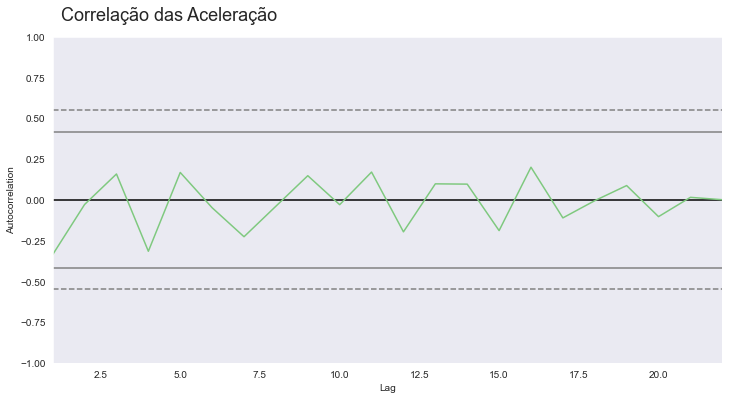

In [99]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aceleração', fontsize = 18, x = 0.26, y = 0.95) # x e y posição do título
autocorrelation_plot(dados['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [100]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [101]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [102]:
assinantes.shape

(24, 2)

In [103]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [104]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [105]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

### A base de dados contém 24 tuplas com 2 colunas, nenhum valor nulo, e o type mês foi alterado para datetime

In [106]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


### Adicionado duas novas variaveis, o qual a primeira retem a diferença dos assinantes referente ao mês anterior
### A segunda Variável retorna a diferença do aumento em relação ao aumento do mês anterior
### ex: do mês 1 para o mês 2 houve um aumento de 11 assinantes, 1 assinante a mais no aumento comparado ao mês 1

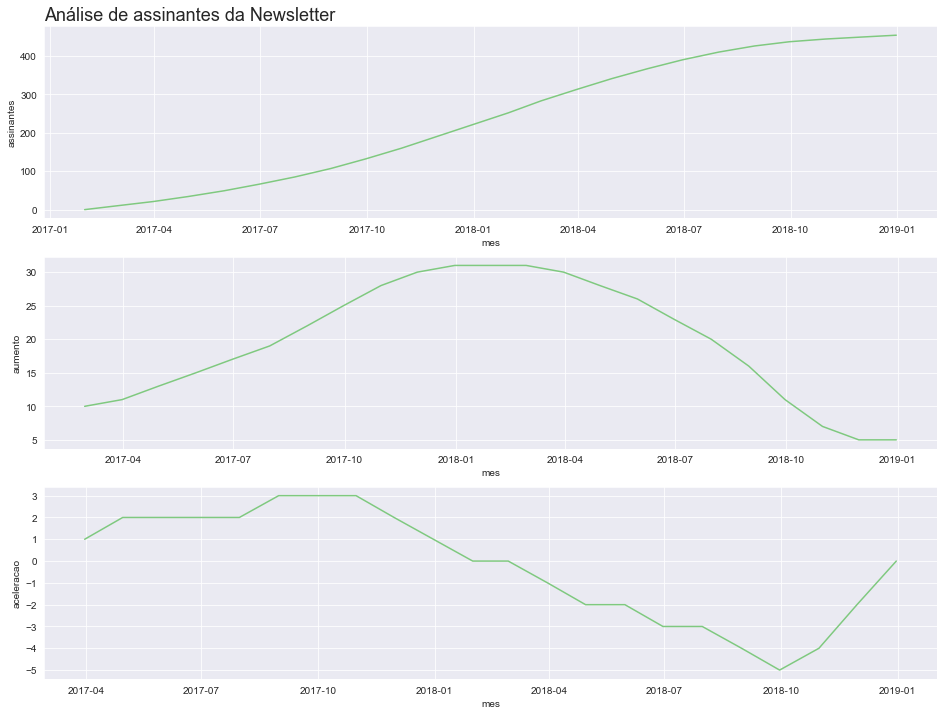

In [107]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 'Análise de assinantes da Newsletter', assinantes)

Grafico 1: Houve um aumento de assinantes no deccorer do tempo, a partir do mês 10/2018 a curva deixa de ser constante e cada vez mais vai ficando horizontal, o que demonstra uma sequência de perdas de assinaturas.

Grafico 2: Confirma o aumento do gráfico 1, e mostra como foi diminuindo o número de assinantes mensais a partir do mês 01/2018

Grafico 3: Mostra a diferença de ganhos e perdas de assinanstes no mês, e começou a ficar negativo a partir do mês 4/2018 até o mês 10/2018 e então volta subir e normalizar apenas no mês 01/2019

# Chocolura - Analisando as vendas

In [108]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [109]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [110]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [111]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


## 24 tuplas, 2 colunas, 0 dados nulos

In [112]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [113]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


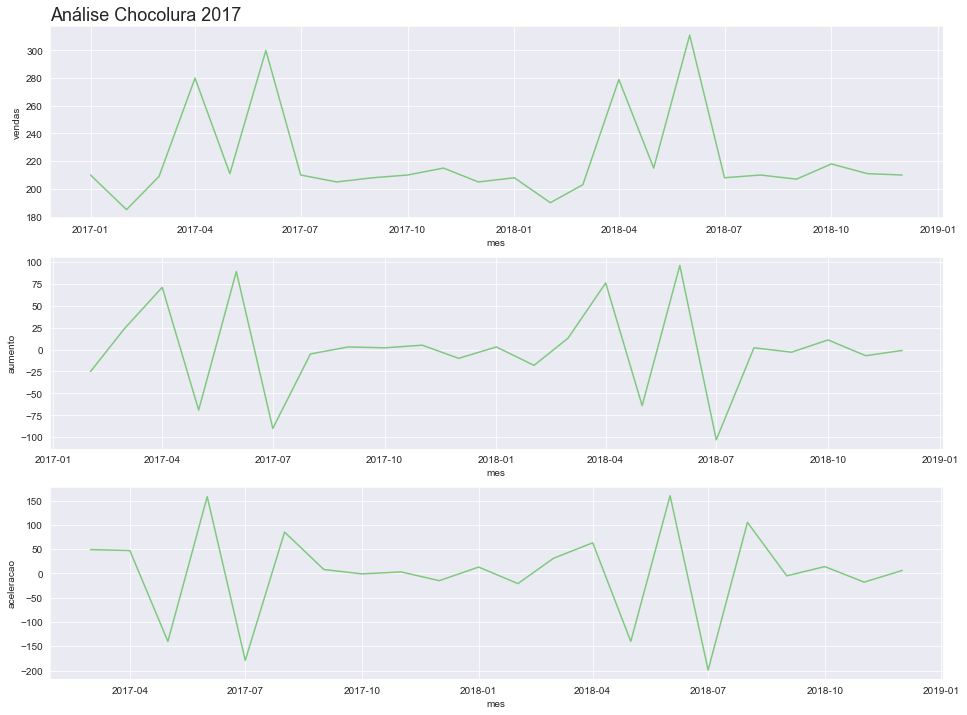

In [114]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 'Análise Chocolura 2017', chocolura)

### Os gráficos mostram que há uma sazionalidade, o mês 4 e o mês 7 de todo ano tem um grande aumento de vendas chegando a atingir 300 vendas no mês 7, enquanto que no decorrer do ano as vendas são um pouco lineares entre 200 e 220 vendas.

# Chocolura - Vendas diárias Outubro e Novembro

In [115]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [116]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### 61 tuplas, 2 colunas, nenhum dado nulo

In [117]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [118]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [119]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


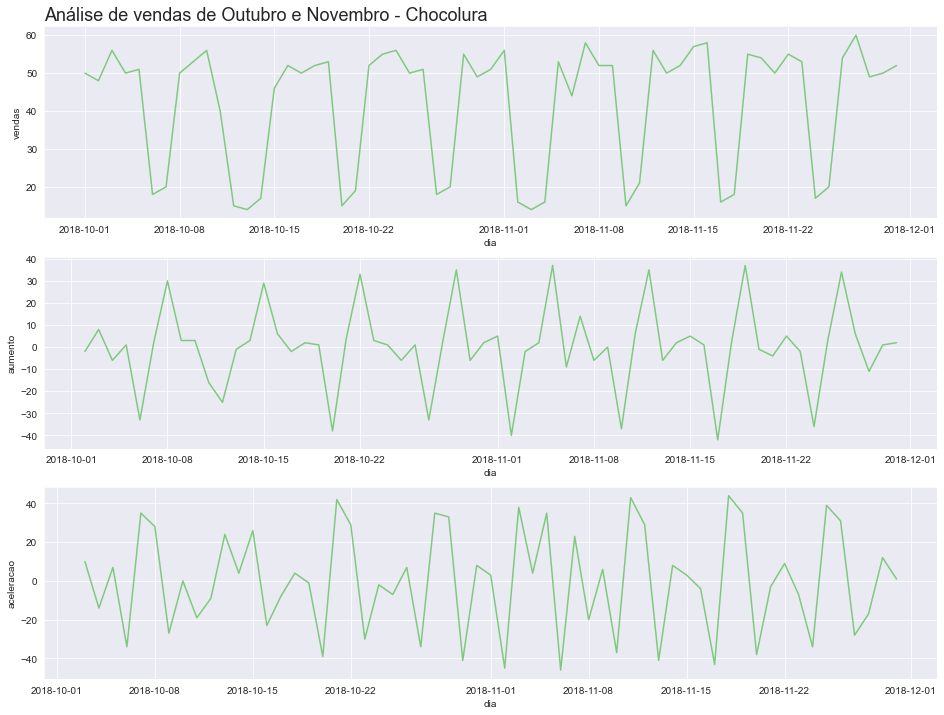

In [120]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 'Análise de vendas de Outubro e Novembro - Chocolura', vendas_por_dia)

In [121]:
vendas_por_dia['dias_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [122]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [123]:
vendas_por_dia['dias_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [124]:
traducao_dias = {'Monday': 'Segunda', 'Tuesday': 'Terca', 'Wednesday': 'Quarta',
                 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sabado',
                'Sunday': 'Domingo'}

In [125]:
vendas_por_dia['dias_da_semana'] = vendas_por_dia['dias_da_semana'].map(traducao_dias)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [126]:
vendas_agrupadas = vendas_por_dia.groupby('dias_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-126-673381540ac4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dias_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [127]:
vendas_agrupadas

,vendas,aumento,aceleracao
dias_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


### As quedas de vendas podem se referir por regras de negócios, como feriados nacionais, e finais de semanas com horário de atendimento reduzido

# Correlação das Vendas Diárias

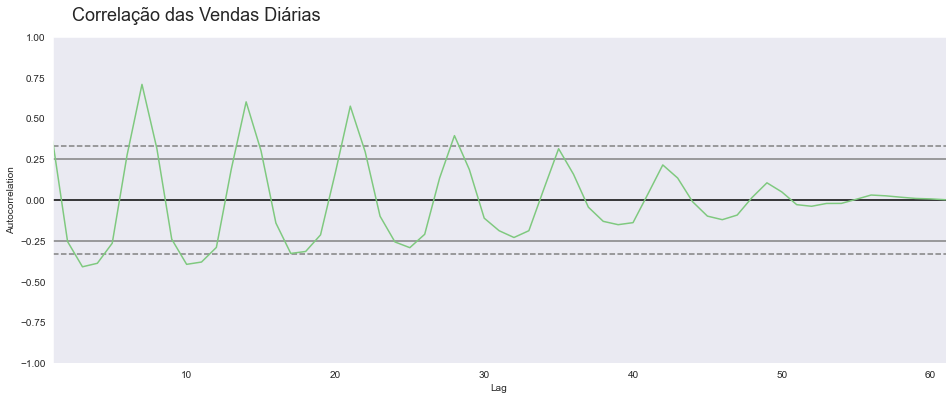

In [128]:
ax = plt.figure(figsize = (16,6))
ax.suptitle('Correlação das Vendas Diárias', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

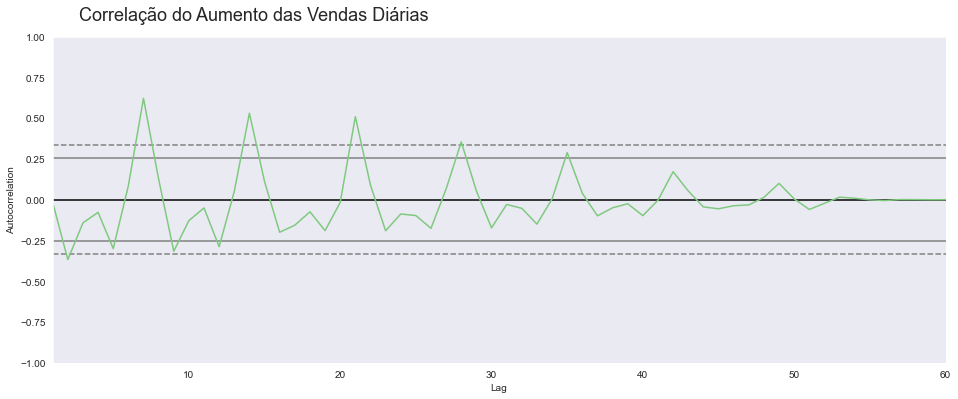

In [129]:
ax = plt.figure(figsize = (16,6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

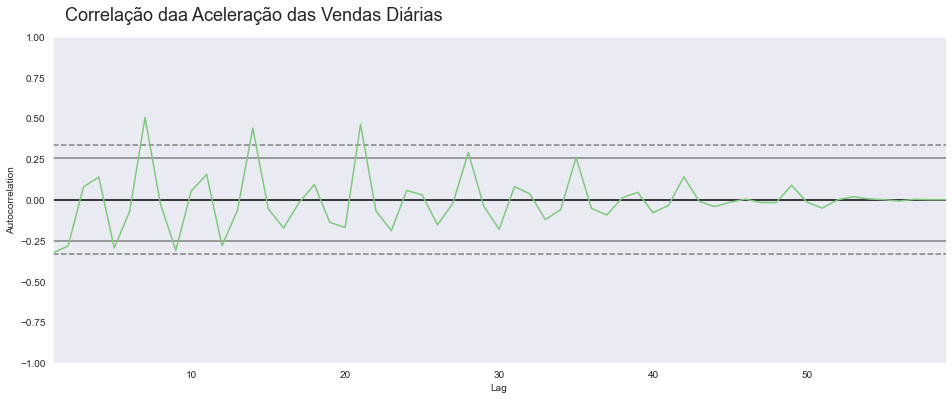

In [130]:
ax = plt.figure(figsize = (16,6))
ax.suptitle('Correlação daa Aceleração das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura Análise de Vendas - Normalização

In [131]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [132]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [133]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [134]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


### Temos uma base de dados com, 24 tuplas, 2 colunas e nenhum dado nulo

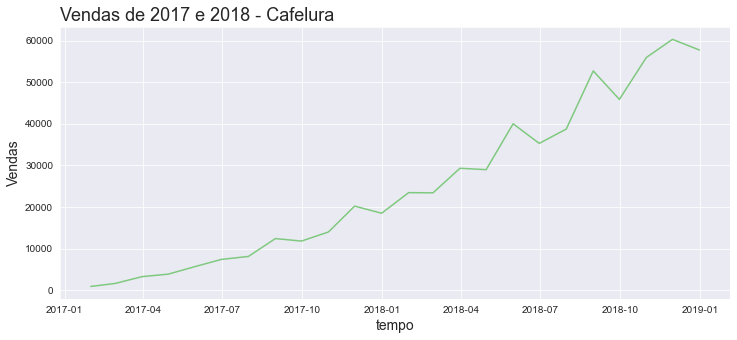

In [135]:
plotar('Vendas de 2017 e 2018 - Cafelura', 'tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [136]:
finais_de_semana = pd.read_csv('dados/dias_final_de_semana.csv')
finais_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [137]:
finais_de_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [138]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / finais_de_semana['quantidade_de_dias'].values 

In [139]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


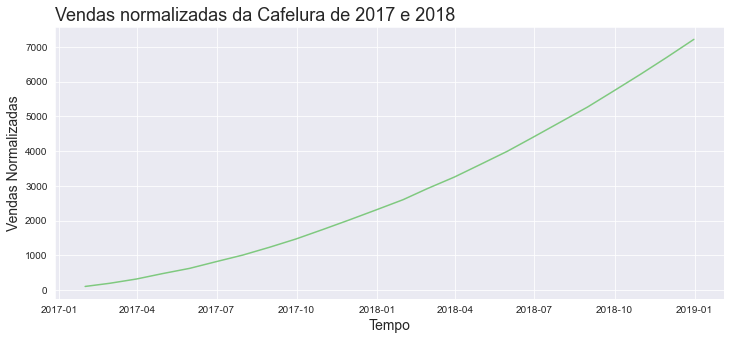

In [140]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

# Statsmodels

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose

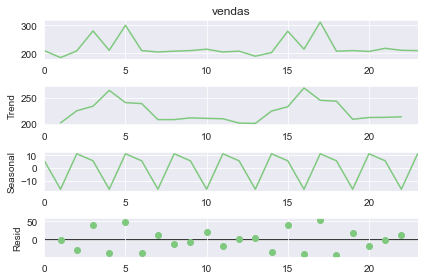

In [152]:
resultado = seasonal_decompose(chocolura['vendas'], period = 3)
ax = resultado.plot()

In [153]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade =  resultado.seasonal
ruido = resultado.resid

In [154]:
data2 = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data2)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


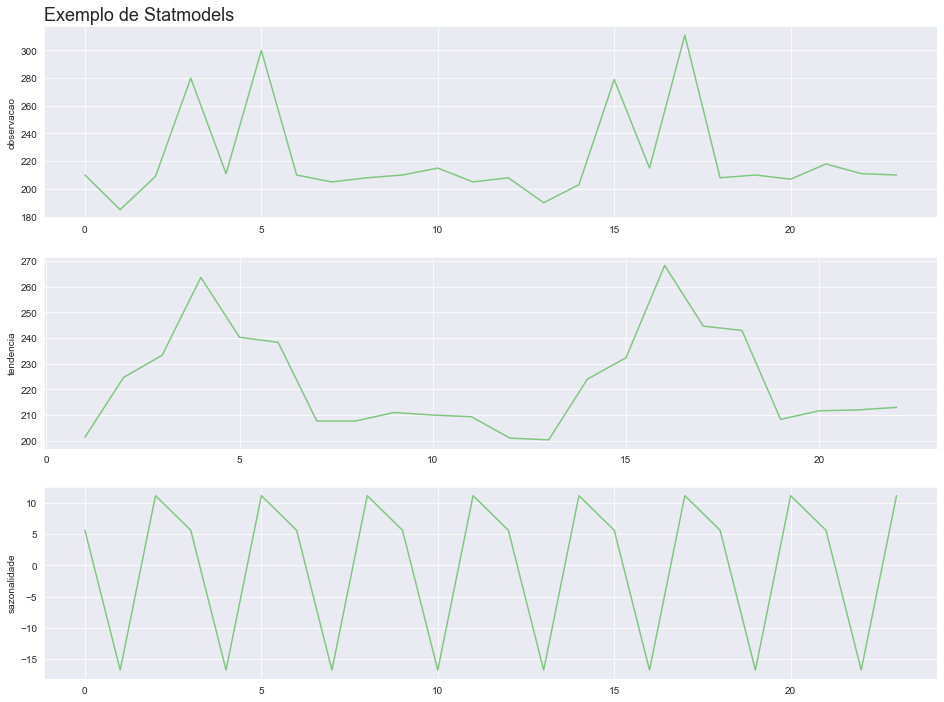

In [156]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade','Exemplo de Statmodels', resultado)

# Alucel - Análise de Vendas

In [158]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [159]:
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [161]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [162]:
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


### 61 tuplas, 2 colunas e nenhum dado nulo

In [163]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


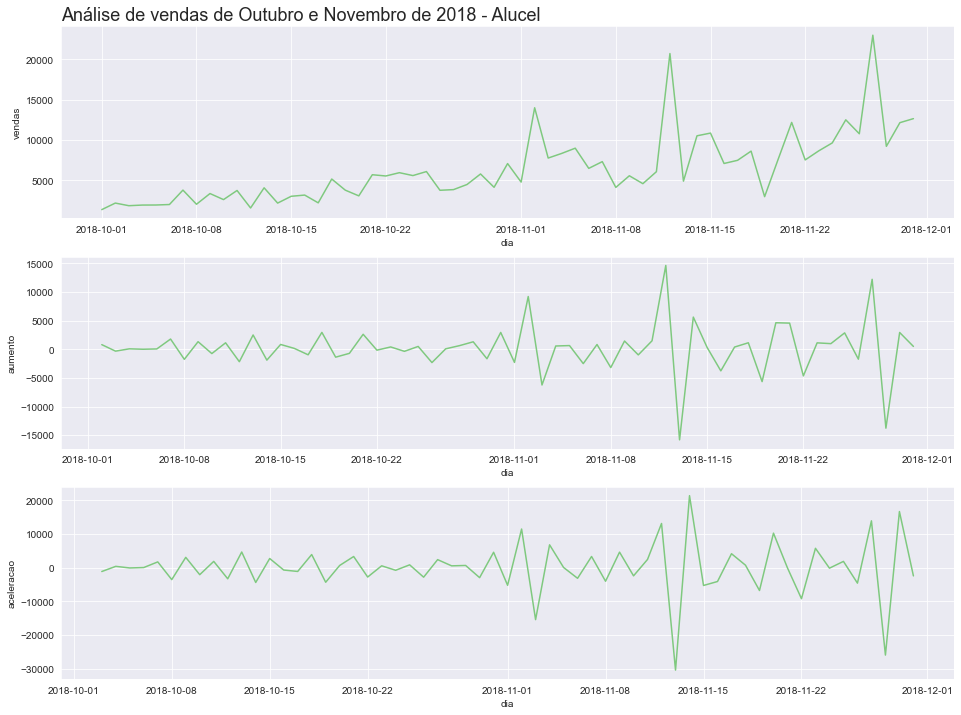

In [167]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 'Análise de vendas de Outubro e Novembro de 2018 - Alucel', alucel)

# Média móvel

In [168]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [170]:
alucel.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


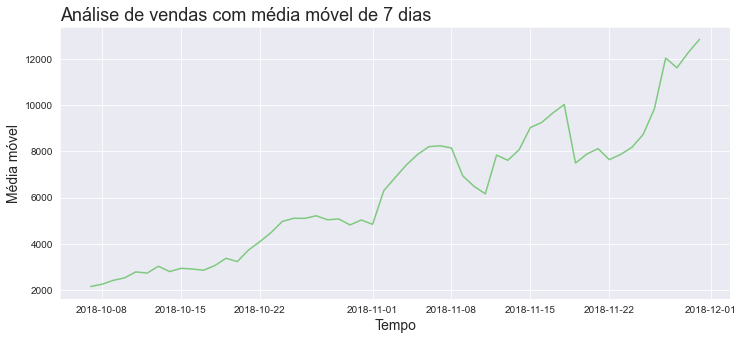

In [171]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel )